<a href="https://colab.research.google.com/github/Spacetr0naut/MietpreiseHamburg/blob/main/postprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [115]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [116]:
%cd /content/drive/MyDrive/Tchibo

/content/drive/MyDrive/Tchibo


In [117]:
!pip install pupil-apriltags

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [118]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Circle
from skimage import transform
from skimage.io import imread, imshow

[INFO] loading image...
[INFO] 13 total AprilTags detected
[INFO] tag family: tagStandard41h12 tag ID: 100
[INFO] tag family: tagStandard41h12 tag ID: 101
[INFO] tag family: tagStandard41h12 tag ID: 102
[INFO] tag family: tagStandard41h12 tag ID: 103
[INFO] tag family: tagStandard41h12 tag ID: 104
[INFO] tag family: tagStandard41h12 tag ID: 106
[INFO] tag family: tagStandard41h12 tag ID: 108
[INFO] tag family: tagStandard41h12 tag ID: 109
[INFO] tag family: tagStandard41h12 tag ID: 113
[INFO] tag family: tagStandard41h12 tag ID: 115
[INFO] tag family: tagStandard41h12 tag ID: 116
[INFO] tag family: tagStandard41h12 tag ID: 117
[INFO] tag family: tagStandard41h12 tag ID: 119


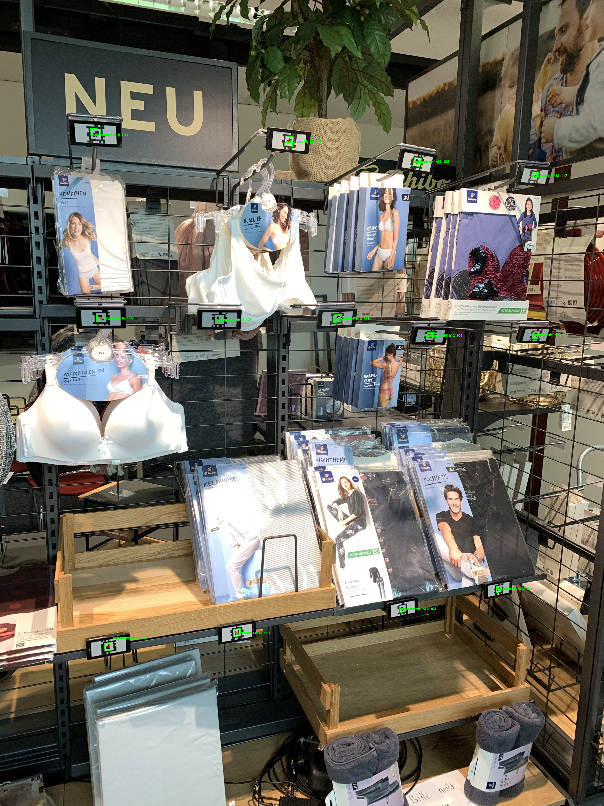

-1

In [131]:
from pupil_apriltags import Detector
import cv2
from google.colab.patches import cv2_imshow


print("[INFO] loading image...")
image = cv2.imread("ist.jpg")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

at_detector = Detector(families='tagStandard41h12',
                       nthreads=1,
                       quad_decimate=1.0,
                       quad_sigma=0.0,
                       refine_edges=1,
                       decode_sharpening=0.25,
                       debug=0)

results = at_detector.detect(gray)

print("[INFO] {} total AprilTags detected".format(len(results)))

# loop over the AprilTag detection results
for r in results:
    # extract the bounding box (x, y)-coordinates for the AprilTag
    # and convert each of the (x, y)-coordinate pairs to integers
    (ptA, ptB, ptC, ptD) = r.corners
    ptB = (int(ptB[0]), int(ptB[1]))
    ptC = (int(ptC[0]), int(ptC[1]))
    ptD = (int(ptD[0]), int(ptD[1]))
    ptA = (int(ptA[0]), int(ptA[1]))
    # draw the bounding box of the AprilTag detection
    cv2.line(image, ptA, ptB, (0, 255, 0), 2)
    cv2.line(image, ptB, ptC, (0, 255, 0), 2)
    cv2.line(image, ptC, ptD, (0, 255, 0), 2)
    cv2.line(image, ptD, ptA, (0, 255, 0), 2)
    # draw the center (x, y)-coordinates of the AprilTag
    (cX, cY) = (int(r.center[0]), int(r.center[1]))
    cv2.circle(image, (cX, cY), 5, (0, 0, 255), -1)
    # draw the tag family on the image
    tagFamily = r.tag_family.decode("utf-8")
    tagID = r.tag_id
    cv2.putText(image, tagFamily + " " + str(tagID), (ptA[0], ptA[1] - 15),
                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
    print("[INFO] tag family: {}".format(tagFamily)+" tag ID: {}".format(tagID))
# show the output image after AprilTag detection
dim = image.shape
image_resize = cv2.resize(image, (int(dim[1]/5),int(dim[0]/5)))
cv2_imshow(image_resize)
cv2.waitKey(0)

In [124]:
points_of_interest = []
for r in results:
  points_of_interest.append(r.center)

points_of_interest = np.array(points_of_interest)
poi = points_of_interest
poi_soll = poi
poi_soll

array([[119.3098966 , 189.3337147 ],
       [360.33070517, 188.89114036],
       [621.31346759, 188.40142229],
       [872.31028196, 191.37376981],
       [ 82.28310953, 544.36387031],
       [246.28868513, 544.46504745],
       [418.27733146, 545.472323  ],
       [638.2656734 , 549.87544728],
       [864.2652204 , 545.26001243],
       [ 76.2776037 , 872.93543797],
       [260.2891683 , 872.38180994],
       [507.25472876, 868.95339864],
       [827.27487817, 868.93218518]])

In [128]:
poi_soll*3

array([[ 357.92968981,  568.00114409],
       [1080.99211552,  566.67342109],
       [1863.94040278,  565.20426686],
       [2616.93084587,  574.12130944],
       [ 246.84932859, 1633.09161093],
       [ 738.86605538, 1633.39514235],
       [1254.83199437, 1636.416969  ],
       [1914.79702019, 1649.62634183],
       [2592.79566119, 1635.78003728],
       [ 228.8328111 , 2618.80631392],
       [ 780.86750491, 2617.14542982],
       [1521.76418629, 2606.86019593],
       [2481.82463451, 2606.79655554]])

In [109]:
import math
import numpy as np
import matplotlib.pyplot as plt

from skimage import data
from skimage import transform

In [130]:
img.shape

(4032, 3024, 3)

In [142]:
img = cv2.imread("ist.jpg")

dst = np.array([[300,400],
       [2700,400],
       [300,3600],
       [2700,3600]])

src = np.array([[300,400],
       [2700,100],
       [300,3600],
       [2700,4000]])

tform = transform.estimate_transform('projective', src, dst)
tf_img_warp = transform.warp(img, tform.inverse, mode = 'symmetric')

plt.figure(num=None, figsize=(8, 6), dpi=80)
fig, ax = plt.subplots(1,2, figsize=(15, 10), dpi = 80)
ax[0].set_title(f'Original', fontsize = 15)
ax[0].imshow(img)
ax[0].set_axis_off();

ax[1].set_title(f'Transformed', fontsize = 15)
ax[1].imshow(tf_img_warp)
ax[1].set_axis_off();

<Figure size 640x480 with 0 Axes>

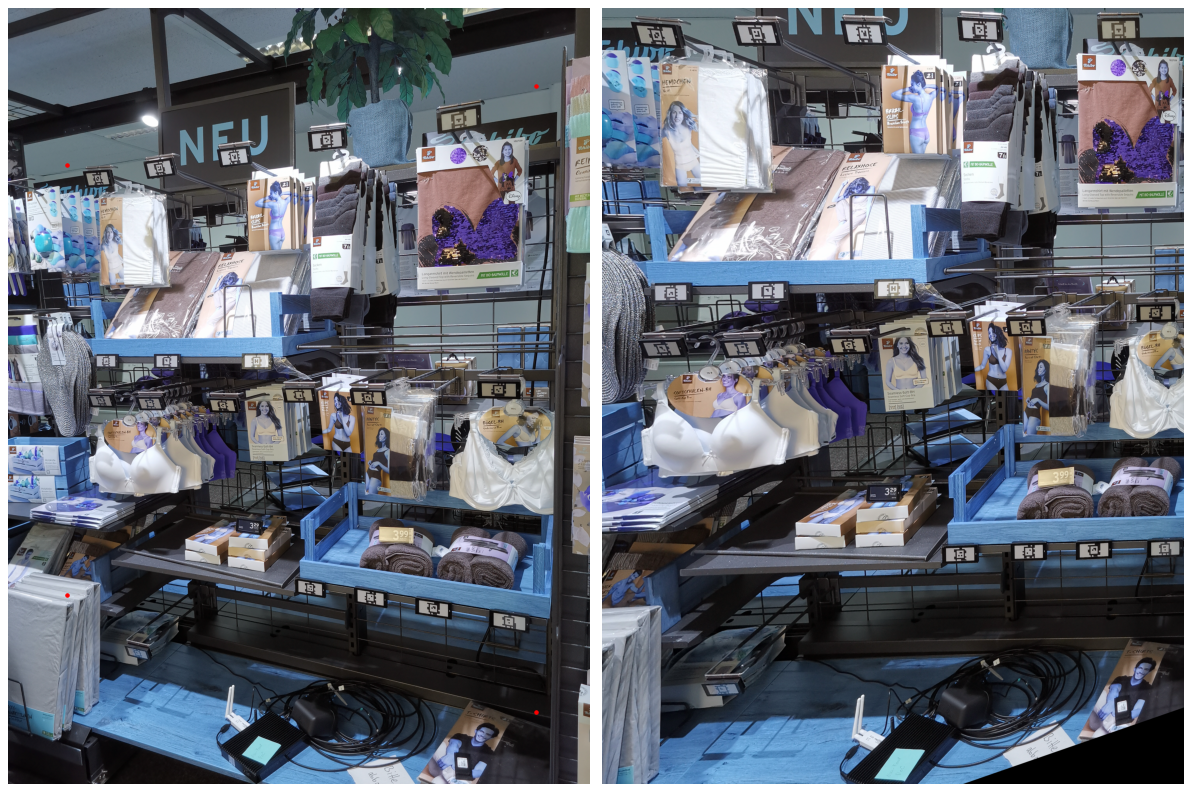

In [151]:
text = cv2.imread("ist2.jpg")

dst = np.array([[300,800],
       [2700,400],
       [300,3000],
       [2700,3600]])

src = np.array([[0,0],
       [3000,0],
       [0,3200],
       [3000,3200]])

tform3 = transform.ProjectiveTransform()
tform3.estimate(src, dst)
warped = transform.warp(text, tform3)


fig, ax = plt.subplots(1,2, figsize=(15, 10), dpi = 80)

ax[0].imshow(text, cmap=plt.cm.gray)
ax[0].plot(dst[:, 0], dst[:, 1], '.r')
ax[1].imshow(warped, cmap=plt.cm.gray)

for a in ax:
    a.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
def dist(x):
  return
poi.sort(key = lambda p: (p.x - x)**2 + (p))

In [106]:
ind = np.lexsort((poi[:,0],poi[:,1]))
#poi[poi[:,1].argsort()]
poi[ind]

array([[ 479.71324628,  669.65278553],
       [1447.39197207,  706.43050274],
       [2089.02864459,  810.29909094],
       [2676.90718863,  880.41435084],
       [ 506.74809413, 1589.80458808],
       [1688.4485803 , 1593.29448353],
       [1099.31227708, 1598.84431844],
       [2682.47834317, 1676.27076203],
       [2154.16244639, 1680.47971069],
       [2496.67620291, 2946.9799047 ],
       [2016.21026055, 3045.50916087],
       [1186.84700423, 3164.61072845],
       [ 544.94886097, 3234.72038388]])

In [104]:
np.array(poi[:,0]**2 + poi[:,1]**2)

array([  678559.65182917, 14918082.62091149, 10005573.72921784,
       13340229.86372686,  3764790.63715637, 10760385.22295893,
        5020625.29471724,  7464427.90345514, 11423366.87410012,
        2784272.25917606,  2593987.57600769,  7940961.52572176,
        5389445.91958306])

In [103]:
np.lexsort(np.array(poi[:,0]**2 + poi[:,1]**2))
#poi[ind]

0